In [1]:
import os.path

# import pandas as pd
# import time
# import pandas as pd
# import numpy as np
import datetime
import json

import numpy as np

# try:
#     import Image
# except:
# import PIL
from PIL import Image
# import Pillow.Image
# from pillow import Image
# import PIL
# from PIL import Image
# 
# import Image
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import json
import time
import os

# Tensorflow imports
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [4]:
def process_image(image):
    '''
    The process_image function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape (224, 224, 3).
    '''
    # First, convert the image into a TensorFlow Tensor then resize it to the appropriate size using tf.image.resize
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    image = tf.image.resize(image, (224,224))
    #Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. 
    # #Therefore, you'll also need to normalize the pixel values
    image /= 255

    image = image.numpy()
    return image
    
def prediction(image_path,model,top_k):
    import os
    model = 'my_model2'
    export_path = os.path.join(os.getcwd(),model)
    # Load the model passed into the function
    # reloaded_keras_model = tf.keras.models.load_model(model, custom_objects={'KerasLayer':hub.KerasLayer})
    reloaded_keras_model = tf.saved_model.load(export_path)
    # Process the image selected
    im = Image.open(image_path)
    test_image = np.asarray(im)
    processed_test_image = process_image(test_image)

    #The image returned by the process_image function is a NumPy array with shape (224, 224, 3) but the model expects the input images to be of shape (1, 224, 224, 3). This extra dimension represents the batch size.
    # Use  np.expand_dims() function to add the extra dimension.
    processed_test_image = np.expand_dims(processed_test_image, axis=0)

    # Create the model to get the probabilities by using the model and softmax layer as the input
    # probability_model = tf.keras.Sequential([reloaded_keras_model, 
                                          # tf.keras.layers.Softmax()])
    
    # Get the predictions by using the probability model to predict the input image 
    # predictions = probability_model.predict(processed_test_image)
    predictions = reloaded_keras_model(processed_test_image)
    predictions = np.array(predictions)
    # Get the index of the top 10 probabilities
    top_idxs = predictions[0].argsort()[-top_k:][::-1]
    
    # Get the top 10 probabilities
    top_probabilities = predictions[0][top_idxs]
    probs = top_probabilities
    
    # Get the labels (the index of the probabilities)
    labels_nums = [str(idx) for idx in top_idxs]
    classes = labels_nums
    return probs, classes


def get_label_names(json_file, labels):
    '''
    Given json_file that contains the label names for the label numbers, return the correct label names from array 'label'
    '''
    with open(json_file, 'r') as f:
        class_names = json.load(f)
    new_class_names = {}
    for key in class_names:
        new_class_names[int(key)-1]=class_names[key]
    label_names = [new_class_names[int(i)] for i in labels]
    return label_names

In [5]:
1587680462.h5

SyntaxError: invalid syntax (<ipython-input-5-d9ffacab3b56>, line 1)

In [3]:
tf.saved_model.load('https://github.com/maivey/image-classifier/blob/master/1587680462.h5')

UnimplementedError: File system scheme 'https' not implemented (file: 'https://github.com/maivey/image-classifier/blob/master/1587680462.h5/saved_model.pb')

In [6]:
import os
model = 'my_model2'
# export_path = os.path.join(os.getcwd(),model)


# export_path = os.path.join(os.getcwd(),model)
# Load the model passed into the function
# reloaded_keras_model = tf.keras.models.load_model(model, custom_objects={'KerasLayer':hub.KerasLayer})
# reloaded_keras_model = tf.saved_model.load(export_path)
reloaded_keras_model = tf.saved_model.load(model)

image_path ='uploads/cautleya_spicata.jpg'
# Process the image selected
im = Image.open(image_path)
test_image = np.asarray(im)
processed_test_image = process_image(test_image)

#The image returned by the process_image function is a NumPy array with shape (224, 224, 3) but the model expects the input images to be of shape (1, 224, 224, 3). This extra dimension represents the batch size.
# Use  np.expand_dims() function to add the extra dimension.
processed_test_image = np.expand_dims(processed_test_image, axis=0)

# Create the model to get the probabilities by using the model and softmax layer as the input
# probability_model = tf.keras.Sequential([reloaded_keras_model, 
                                      # tf.keras.layers.Softmax()])

# Get the predictions by using the probability model to predict the input image 
# predictions = probability_model.predict(processed_test_image)
predictions = reloaded_keras_model(processed_test_image)
predictions = np.array(predictions)
top_k=5
top_idxs = predictions[0].argsort()[-top_k:][::-1]
    
    # Get the top 10 probabilities
top_probabilities = predictions[0][top_idxs]
probs = top_probabilities

# Get the labels (the index of the probabilities)
labels_nums = [str(idx) for idx in top_idxs]
classes = labels_nums

In [7]:
labels_nums

['60', '23', '59', '92', '38']

In [8]:
label_names = get_label_names('label_map.json', classes)
label_names

['cautleya spicata',
 'red ginger',
 'pink-yellow dahlia',
 'ball moss',
 'siam tulip']

In [14]:
os.path.join('uploads', 'hello')

'uploads/hello'

In [9]:
from keras.models import load_model

Using TensorFlow backend.


In [17]:
model = load_model('1587680462.h5',custom_objects={'KerasLayer':hub.KerasLayer})

OSError: SavedModel file does not exist at: /var/folders/8m/4ys_00hx7rvbyb6tdl_2yy5h0000gn/T/tfhub_modules/145bb06ec3b59b08fb564ab752bd5aa222bfb50a/{saved_model.pbtxt|saved_model.pb}

In [19]:
tf.saved_model.load('my_model2')

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0xb49bf7a90>

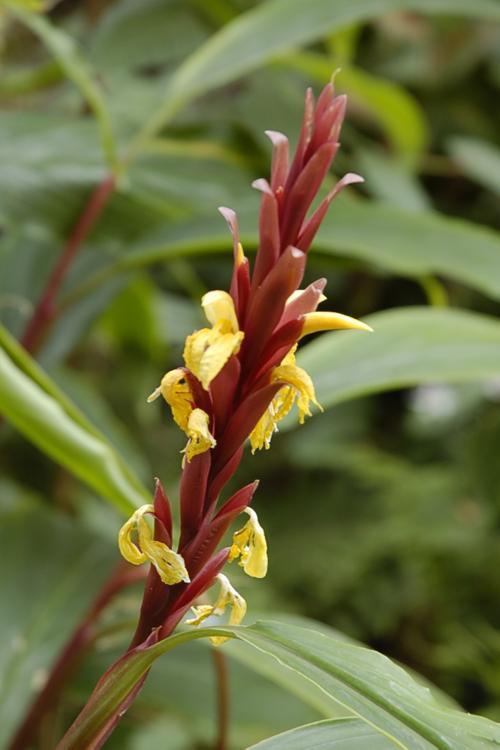

In [24]:
image_path ='uploads/cautleya_spicata.jpg'
# Process the image selected
im = Image.open(image_path)
im

In [20]:
from PIL import Image
import requests
from io import BytesIO

In [33]:
my_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Cosmos_bipinnatus_pink%2C_Burdwan%2C_West_Bengal%2C_India_10_01_2013.jpg/1920px-Cosmos_bipinnatus_pink%2C_Burdwan%2C_West_Bengal%2C_India_10_01_2013.jpg'

In [34]:
my_response = requests.get(my_url)
img = Image.open(BytesIO(my_response.content))

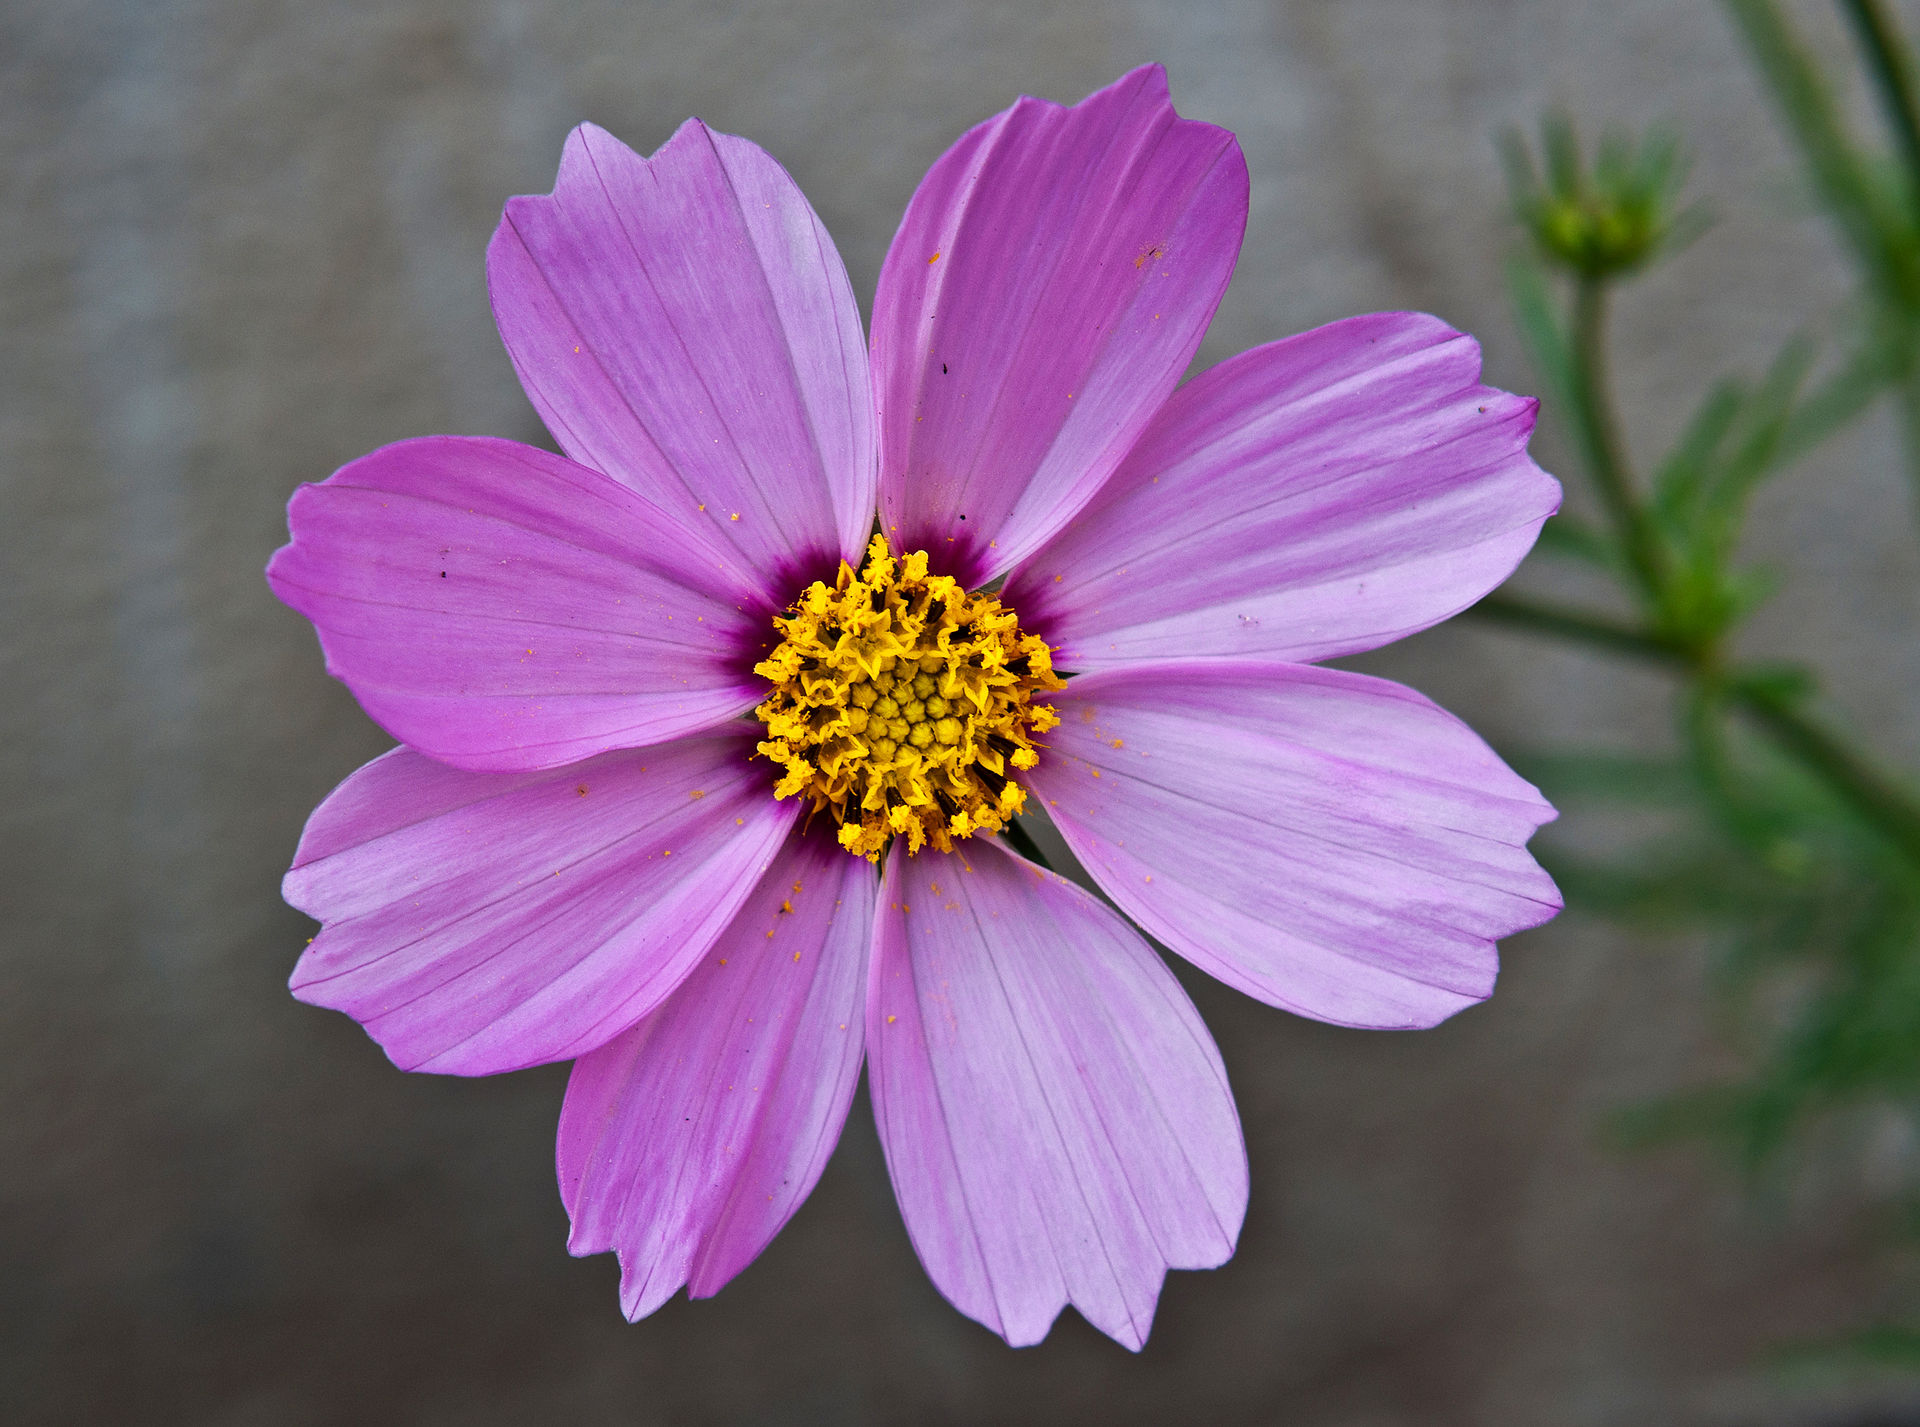

In [35]:
img

In [28]:
test_image = np.asarray(img)
processed_test_image = process_image(test_image)

#The image returned by the process_image function is a NumPy array with shape (224, 224, 3) but the model expects the input images to be of shape (1, 224, 224, 3). This extra dimension represents the batch size.
# Use  np.expand_dims() function to add the extra dimension.
processed_test_image = np.expand_dims(processed_test_image, axis=0)

# Create the model to get the probabilities by using the model and softmax layer as the input
# probability_model = tf.keras.Sequential([reloaded_keras_model, 
                                      # tf.keras.layers.Softmax()])

# Get the predictions by using the probability model to predict the input image 
# predictions = probability_model.predict(processed_test_image)
predictions = reloaded_keras_model(processed_test_image)
predictions = np.array(predictions)
top_k=5
top_idxs = predictions[0].argsort()[-top_k:][::-1]
    
    # Get the top 10 probabilities
top_probabilities = predictions[0][top_idxs]
probs = top_probabilities

# Get the labels (the index of the probabilities)
labels_nums = [str(idx) for idx in top_idxs]
classes = labels_nums
label_names = get_label_names('label_map.json', classes)
label_names

['mexican aster',
 'japanese anemone',
 'windflower',
 'garden phlox',
 'oxeye daisy']

In [47]:
classes

['33', '61', '68', '31', '48']

In [31]:
a = str('http://0.0.0.0:5000/')
b = str('/uploads/orange_dahlia.jpg/2')
a+b[1:]

'http://0.0.0.0:5000/uploads/orange_dahlia.jpg/2'

In [36]:
class_names = {"21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster", "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy", "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly", "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist", "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower", "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation", "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone", "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow", "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid", "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia", "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura", "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium", "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily", "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william", "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon", "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula", "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower", "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple", "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus", "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily", "46": "wallflower", "77": "passion flower", "51": "petunia"}
class_names

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 

In [50]:
# with open(json_file, 'r') as f:
#     class_names = json.load(f)
label_names=classes
new_class_names = {}
for key in class_names:
#     print(key)
    new_class_names[int(key)-1]=class_names[key]
new_class_names
label_names = [new_class_names[int(i)] for i in label_names]
label_names

['mexican aster',
 'japanese anemone',
 'windflower',
 'garden phlox',
 'oxeye daisy']

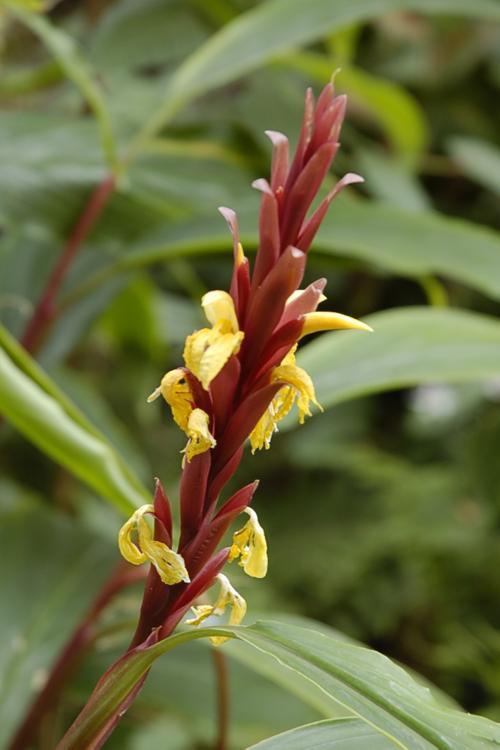

In [51]:
url = 'http://0.0.0.0:5000/uploads/cautleya_spicata.jpg/1'
my_response = requests.get(url)
img = Image.open(BytesIO(my_response.content))
img

In [54]:
from splinter import Browser
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
from IPython.display import display 
from IPython.display import display_html
import datetime
import time


executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=True)

low_url = 'http://0.0.0.0:5000/'
browser.visit(low_url)
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 78


In [57]:
import urllib.request
from bs4 import BeautifulSoup
with urllib.request.urlopen("http://0.0.0.0:5000/") as url:
    s = url.read()
    # I'm guessing this would output the html source code ?
print(s)
# url = "http://0.0.0.0:5000/"
# html = urllib.urlopen(url).read()
# soup = BeautifulSoup(html)

b'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <title>Flower Classifier - Home</title>\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n  <!-- <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootswatch/3.3.7/superhero/bootstrap.min.css"> -->\n  <link href="https://fonts.googleapis.com/css?family=Ubuntu" rel="stylesheet">\n  <script src="https://code.jquery.com/jquery-3.1.1.slim.min.js" integrity="sha384-A7FZj7v+d/sdmMqp/nOQwliLvUsJfDHW+k9Omg/a/EheAdgtzNs3hpfag6Ed950n" crossorigin="anonymous"></script>\n  <script src="//code.jquery.com/jquery-1.11.1.min.js"></script>\n  <script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>\n\n\n  <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">\n\n  <link rel="stylesheet" href="static/css/styles.css">\n<

In [53]:
import urllib
from bs4 import BeautifulSoup

url = "http://0.0.0.0:5000/"
html = urlopen(url).read()
soup = BeautifulSoup(html)

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

NameError: name 'urlopen' is not defined

In [67]:
# import urlopen
soup = BeautifulSoup(urllib.request.urlopen("http://0.0.0.0:5000/").read())
for link in soup.find_all('img'):
#     print(link.get('src'))

None


In [68]:
soup.find_all('h1')

[<h1>Flower Image Classifier</h1>, <h1>Classify Your Flower!</h1>]